#Penjelasan CRISP DM

Bussiness Understanding

In [ ]:
Di dalam tahap ini menentukan data dan tujuan dari data ini untuk apa,
Tujuan nya untuk mengetahui berapa Jumlah Kalori yang ada di dalam makanan WhiteCstle ini,
Makanan Junk Food harus diminimalisir karena bisa menyebabkan penyakit serius seperti Kolestrol
Diabetes, dan masih banyak Lagi. Penyakit ini diakibatkan karena Lemak berlebih, Karbohidrat yang berlebih maupun Kurangnya Protein.

Data ini didapatkan dari kaggle "https://www.kaggle.com/datasets/mattop/white-castle-menu-nutrition-data"

Data Understanding

In [ ]:
Data ini terdapat :

 0   Item            95 non-null     object 
 1   Category        95 non-null     object 
 2   Calories        95 non-null     float64
 3   FatCalories     95 non-null     float64
 4   Fat             95 non-null     float64
 5   SatFat          95 non-null     float64
 6   TransFat        95 non-null     float64
 7   Cholesterol     95 non-null     float64
 8   Sodium          95 non-null     float64
 9   TotalCarb       95 non-null     float64
 10  DietaryFiber    95 non-null     float64
 11  Sugars          95 non-null     float64
 12  Protein         95 non-null     float64
 13  WeightWatchers  95 non-null     float64

tipe data: float64(12), object(2)

Data Preparation

In [ ]:
Estimasi Jumlah Kalori Pada Menu With Castle ini Menggunakan Algoitma Regression LinearRegression
Dimana tipe data yang diolah hanya int dan float (numerik), sudah dipilih X dan Y nya

Dimana : 
X : FatCalories,Fat,SatFat,TransFat,Cholesterol,Sodium,TotalCarb,DietaryFiber,Sugars,Protein,WeightWatchers
Y : Calories

Evaluation 

In [ ]:
Evaluasi dilakukan terhadap model yang diterapkan pada tahap sebelumnya 
dengan tujuan agar model yang ditentukan dapat sesuai 
dengan tujuan yang ingin dicapai dalam tahap pertama(bussiness understanding)

Deployment

In [ ]:
Setelah semua tahap dipastikan benar dan sesuai maka model di import, dan di deploy
Deploy model melalui pickle dan ditampilkan di streamlit 

# deskripsi library yang digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memanggil Dataset

In [3]:
df = pd.read_csv('white-castle.csv')

# Deskripsi Dataset

In [4]:
df.head()

,Item,Category,Calories,FatCalories,Fat,SatFat,TransFat,Cholesterol,Sodium,TotalCarb,DietaryFiber,Sugars,Protein,WeightWatchers
0,The Original Slider®,Sliders,140.0,60.0,7.0,2.5,0.0,10.0,380.0,16.0,1.0,2.0,6.0,138.5
1,The Original Slider® (NY/ NJ),Sliders,150.0,60.0,7.0,2.5,0.0,10.0,420.0,17.0,1.0,3.0,6.0,149.5
2,Double Original Slider®,Sliders,250.0,110.0,13.0,4.5,1.0,20.0,690.0,24.0,2.0,3.0,11.0,246.5
3,Double Original Slider® (NY/ NJ),Sliders,260.0,110.0,13.0,4.5,1.0,20.0,770.0,27.0,2.0,5.0,11.0,258.5
4,Cheese,Sliders,170.0,80.0,9.0,4.0,0.5,15.0,510.0,16.0,1.0,2.0,8.0,168.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Item            95 non-null     object 
 1   Category        95 non-null     object 
 2   Calories        95 non-null     float64
 3   FatCalories     95 non-null     float64
 4   Fat             95 non-null     float64
 5   SatFat          95 non-null     float64
 6   TransFat        95 non-null     float64
 7   Cholesterol     95 non-null     float64
 8   Sodium          95 non-null     float64
 9   TotalCarb       95 non-null     float64
 10  DietaryFiber    95 non-null     float64
 11  Sugars          95 non-null     float64
 12  Protein         95 non-null     float64
 13  WeightWatchers  95 non-null     float64
dtypes: float64(12), object(2)
memory usage: 10.5+ KB


<Axes: >

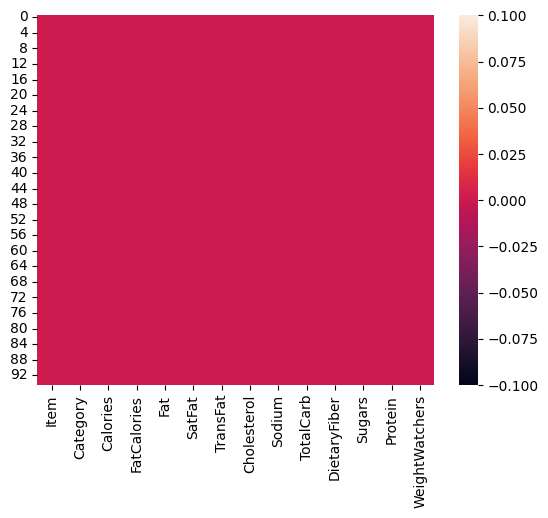

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.describe()

,Calories,FatCalories,Fat,SatFat,TransFat,Cholesterol,Sodium,TotalCarb,DietaryFiber,Sugars,Protein,WeightWatchers
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,309.263158,171.052632,19.126316,6.905263,0.205263,104.263158,663.821053,23.336842,1.178947,5.326316,12.189474,309.305263
std,116.072630,81.167986,8.927893,3.267583,0.375406,98.153073,263.434395,7.136377,0.798655,4.569655,4.890927,116.403994
min,140.000000,60.000000,7.000000,1.000000,0.000000,0.000000,23.000000,3.000000,0.000000,2.000000,2.000000,138.500000
25%,215.000000,100.000000,11.000000,4.000000,0.000000,25.000000,505.000000,17.000000,1.000000,2.000000,9.000000,215.000000
50%,280.000000,160.000000,18.000000,6.000000,0.000000,45.000000,650.000000,23.000000,1.000000,3.000000,11.000000,283.000000
75%,385.000000,220.000000,25.000000,9.000000,0.250000,197.500000,885.000000,29.000000,2.000000,5.000000,15.000000,379.500000
max,570.000000,340.000000,37.000000,15.000000,1.000000,520.000000,1170.000000,46.000000,4.000000,23.000000,25.000000,565.000000


# Visualisasi Data

C:\Users\Nurthariqa\AppData\Local\Temp\ipykernel_9592\2675538813.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

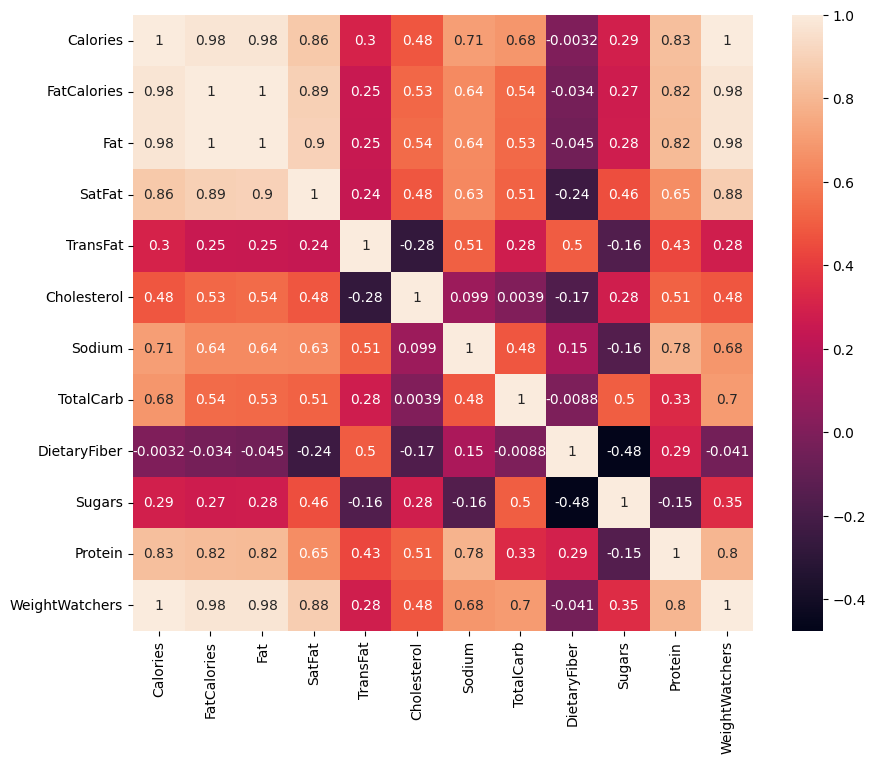

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# Total Lemak Kalori berdasarkan Category

In [11]:
category = df.groupby('Category').count()[['FatCalories']].sort_values(by='FatCalories',ascending=True).reset_index()
category = category.rename(columns={'FatCalories':'CategoryOfFat'})

(array([0, 1]), [Text(0, 0, 'Breakfast'), Text(1, 0, 'Sliders')])

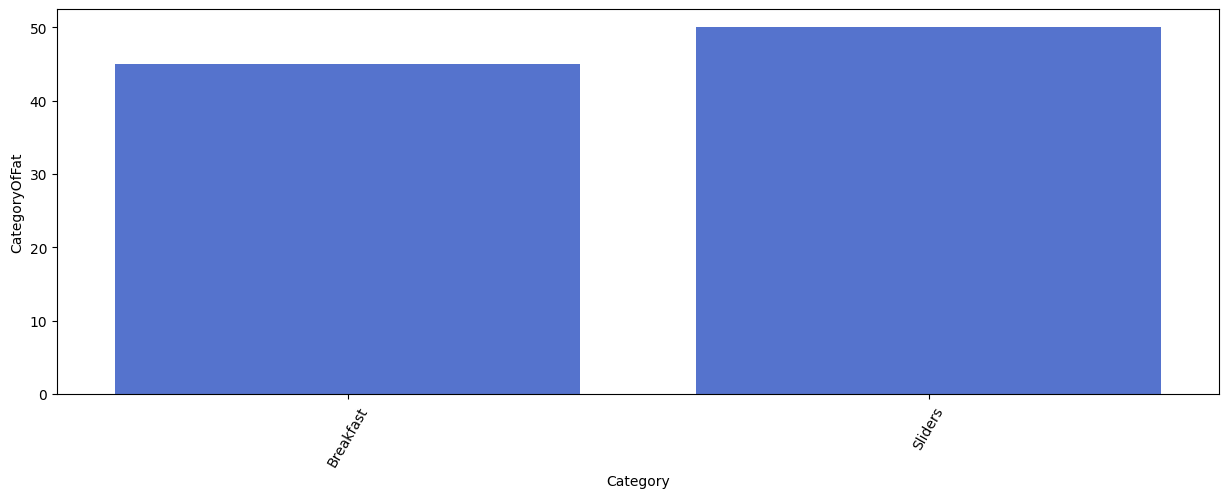

In [12]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=category['Category'], y=category['CategoryOfFat'], color='royalblue')
plt.xticks(rotation=60)

# distribusi Kolestrol

C:\Users\Nurthariqa\AppData\Local\Temp\ipykernel_9592\791673516.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Cholesterol'])


<Axes: xlabel='Cholesterol', ylabel='Density'>

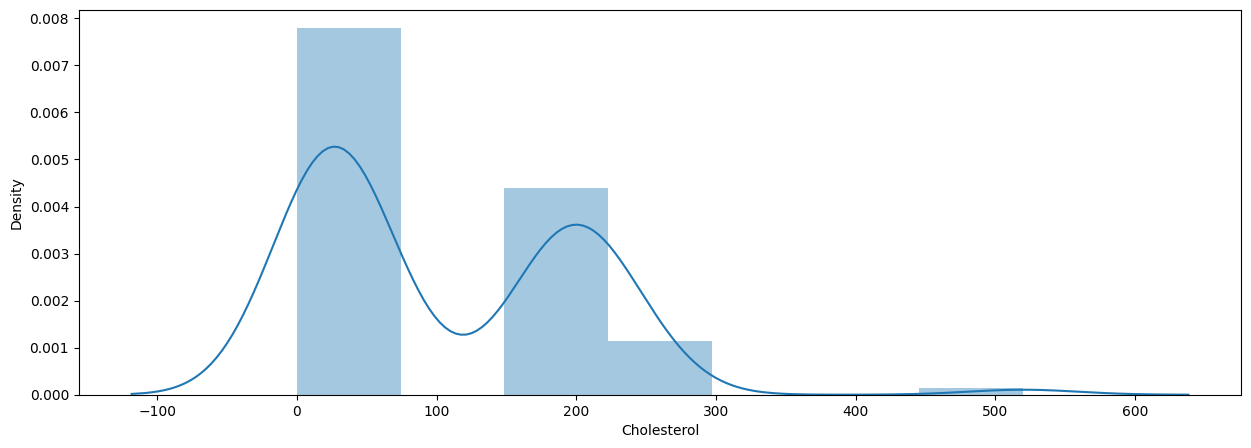

In [13]:
plt.figure(figsize=(15,5))
sns.distplot(df['Cholesterol'])

# distribusi Jumlah Kalori

C:\Users\Nurthariqa\AppData\Local\Temp\ipykernel_9592\2070197214.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Calories'])


<Axes: xlabel='Calories', ylabel='Density'>

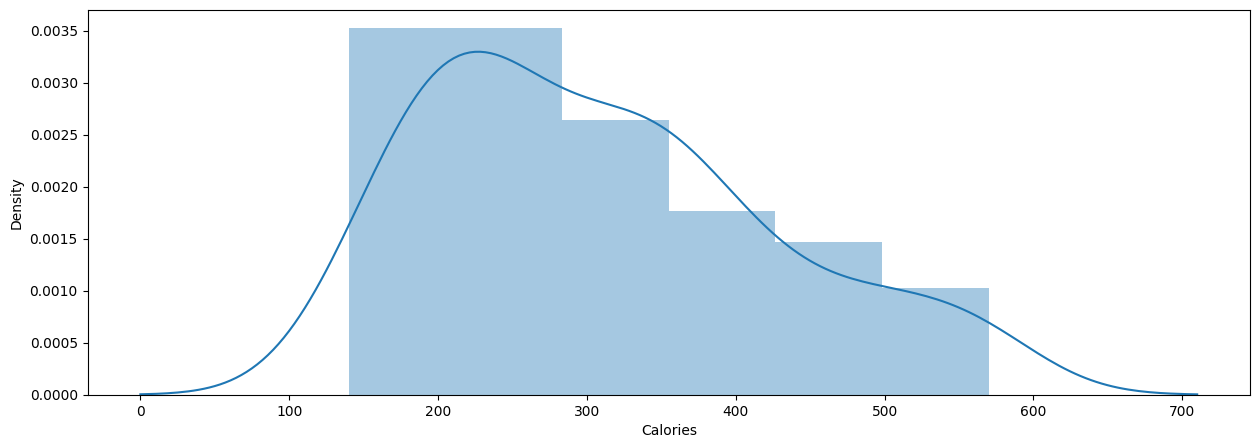

In [14]:
plt.figure(figsize=(15,5))
sns.distplot(df['Calories'])

# seleksi fitur

In [22]:
features = ['FatCalories','Fat','SatFat','TransFat','Cholesterol','Sodium','TotalCarb','DietaryFiber','Sugars','Protein','WeightWatchers']
x = df[features]
y = df['Calories']
x.shape, y.shape

((95, 11), (95,))

# split data training dan data testing

In [24]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(24,)

# membuat model regresi linier

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [26]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  1.0


# membuat inputan model regresi linier

In [28]:
input_data = np.array([[60.0,7.0,2.5,0.0,10.0,380.0,16.0,1.0,2.0,6.0,138.5]])

#calories = 140
prediction = lr.predict(input_data) 
print('Estimasi jumlah kalori (g) :', prediction)

Estimasi jumlah kalori (g) : [140.]


c:\Users\Nurthariqa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# save model

In [29]:
import pickle

filename = 'estimasi_WhiteCastle.sav'
pickle.dump(lr,open(filename,'wb'))